# 17. AMES HOUSING: MODEL TRAINING
---

## 1. Introduction to the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing1_train')
holdout = pd.read_csv('data/Ames_Housing1_test')
print(ames.shape)
print(holdout.shape)
ames.head()

(2344, 80)
(586, 80)


MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL          80.0   10400.0   Pave   NaN       Reg   
1           60        RL           NaN   28698.0   Pave   NaN       IR2   
2           90        RL          70.0    9842.0   Pave   NaN       Reg   
3           90        RL          60.0    7200.0   Pave   NaN       Reg   
4          190        RM          63.0    7627.0   Pave   NaN       Reg   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub     Inside        Gtl       NWAmes        Norm   
1          Low    AllPub    CulDSac        Sev      ClearCr        Norm   
2          Lvl    AllPub        FR2        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
4          Lvl    AllPub     Corner        Gtl      OldTown      Artery   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      1Story             7             5        1976   
1        Norm      1Fam      2Story             5             5        1967   
2        Norm    Duplex      1Story             4             5        1962   
3        Norm    Duplex      1Story             4             5        1949   
4        Norm    2fmCon      2Story             4             6        1920   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            1976      Gable   CompShg      HdBoard      HdBoard      BrkFace   
1            1967       Flat   Tar&Grv      Plywood      Plywood         None   
2            1962      Gable   CompShg      HdBoard      HdBoard         None   
3            1950      Gable   CompShg      BrkFace        Stone         None   
4            1950      Gable   CompShg      AsbShng      AsbShng         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         189.0         TA         TA     CBlock        Gd        TA   
1           0.0         TA         TA      PConc        TA        Gd   
2           0.0         TA         TA       Slab       NaN       NaN   
3           0.0         TA         TA       Slab       NaN       NaN   
4           0.0         Fa         TA     BrkTil        Fa        Po   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            No            Unf           0.0            Unf           0.0   
1            Gd            LwQ         249.0            ALQ         764.0   
2           NaN            NaN           0.0            NaN           0.0   
3           NaN            NaN           0.0            NaN           0.0   
4            No            Unf           0.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0       1090.0         1090.0    GasA         TA           Y      SBrkr   
1          0.0         1013.0    GasA         TA           Y      SBrkr   
2          0.0            0.0    GasA         TA           Y      SBrkr   
3          0.0            0.0    Wall         Fa           N      FuseF   
4        600.0          600.0    GasA         Gd           N      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0      1370.0         0.0              0.0       1370.0             0.0   
1      1160.0       966.0              0.0       2126.0             0.0   
2      1224.0         0.0              0.0       1224.0             0.0   
3      1040.0         0.0              0.0       1040.0             0.0   
4      1101.0       600.0              0.0       1701.0             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          2          0              3              1   
1             1.0          2          1              3              1   
2             0.0          2          0              2              2   
3             0.0          2          0          

## 2. Loading the Transformers

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class ContMissFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        miss_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                 'Total Bsmt SF', 'Garage Area', 'Mas Vnr Area']
        for col in miss_cols:
            df[col] = df[col].fillna(df[col].mean())        
        return df    
    
class LotFrontFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        mean = df['Lot Frontage'].mean()
        df['Lot Frontage'] = df.groupby(['MS SubClass'])['Lot Frontage'].apply(
            lambda x:x.fillna(x.mean()))
        df['Lot Frontage'] = df['Lot Frontage'].fillna(mean)
        return df
    
class DiscMissFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        miss_cols = ['Garage Cars', 'Bsmt Full Bath', 'Bsmt Half Bath']
        for col in miss_cols:
            df[col] = df[col].fillna(df[col].median()) 
            df[col] = df[col].astype(int)
        return df
    
class GYBFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):          
        df = df.copy()
        df['Garage Yr Blt'] = ames.groupby(['MS SubClass'])['Garage Yr Blt'].apply(
            lambda x:x.fillna(x.median()))
        df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(
            df['Garage Yr Blt'].median())
        df['Garage Yr Blt'] = df['Garage Yr Blt'].astype(int)
        return df
    
class NaNExEncoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        likert_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 
                       'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 
                       'Garage Cond', 'Pool QC']
        likert_dict = {'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, np.nan: 0}
        for col in likert_cols:
            df[col] = [likert_dict[item] for item in df[col]]
            df[col] = df[col].astype(int)
        return df
    
class Ord2Encoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        ord2_cols = ['Lot Shape', 'Land Slope', 'Bsmt Exposure', 'BsmtFin Type 1',             
             'BsmtFin Type 2', 'Central Air', 'Fence', 'Sale Condition']

        ord2_dict = {'Reg':8, 'IR1':6, 'IR2':4, 'IR3':2, 'Gtl':9, 'Mod':6, 'Sev':3,
                     'Gd':8, 'Av':6, 'Mn':4, 'No':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 
                     'Rec':4, 'LwQ':3, 'Unf':2, 'Y':10, 'N':5, 'GdPrv':8, 'MnPrv':6, 
                     'GdWo':4, 'MnWw':2, 'Normal':8, 'Abnorml':6, 'AdjLand':5, 'Alloca':4, 
                     'Family':3, 'Partial':2, np.nan:0
                    }
        for col2 in ord2_cols:
            df[col2] = [ord2_dict[item] for item in df[col2]]
        return df
    
class Ord3Encoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        ord3_cols = ['Functional', 'Garage Finish', 'Paved Drive']

        ord3_dict = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 
                     'Sal':1, 'Fin':9, 'RFn':6, 'Unf':3, 'Y':9, 'P':6, 'N':3, np.nan:0
                    }        
        for col3 in ord3_cols:
            df[col3] = [ord3_dict[item] for item in df[col3]]
        return df
    
class NominalFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        nom_cols = ['Mas Vnr Type', 'Garage Type', 'Alley', 'Misc Feature']              
        for col in nom_cols:
            df[col] = df[col].fillna('None')
        return df
    
class YrsRemodeler(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        df['Yrs_until_Remod'] = df['Year Remod/Add'] - df['Year Built']
        return df
    
class ColDropper(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        drop_cols = ['Garage Area', '1st Flr SF', 'Garage Yr Blt', 
                     'TotRms AbvGrd']
        for col in drop_cols:
            df = df.drop(col, axis=1)        
        return df
    
class DummyMaker(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        dumb_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
                     'Utilities', 'Lot Config', 'Neighborhood', 'Condition 1', 
                     'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 
                     'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
                     'Foundation', 'Heating', 'Electrical', 'Garage Type', 
                     'Misc Feature', 'Sale Type']
        for col in dumb_cols:
            dummies = pd.get_dummies(df[col], prefix=col)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop([col], axis=1)      
        return df
    
class OutlierCapper(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        cont_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                     'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                     '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                     'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
                     '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
        for col in cont_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            LB = Q1 - (IQR * 1.5)
            UB = Q3 + (IQR * 1.5)
            df.loc[df[col] > UB, col] = UB
            df.loc[df[col] < LB, col] = LB
        return df
    
from sklearn.preprocessing import StandardScaler

class DfStdScaler(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        stdizer = StandardScaler()
        std_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                     'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                     '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                     'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
                     '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
                   'Year Remod/Add', 'Yrs_until_Remod', 'Year Built', 'Garage Yr Blt', 
                    'Yr Sold']
        df[std_cols] = stdizer.fit_transform(df[std_cols])
        return df

## 3. Preprocessing the Training Set

In [3]:
import joblib
pipeline = joblib.load('files/ames_fit_pipeline')
pipeline

Pipeline(steps=[('cont_filler1', ContMissFiller()),
                ('cont_filler2', LotFrontFiller()),
                ('disc_filler1', DiscMissFiller()),
                ('disc_filler2', GYBFiller()),
                ('likert_encoder', NaNExEncoder()),
                ('ord2_encoder', Ord2Encoder()),
                ('ord3_encoder', Ord3Encoder()),
                ('nom_filler', NominalFiller()), ('remodeler', YrsRemodeler()),
                ('dumber', DummyMaker()), ('stdizer', DfStdScaler())])

In [4]:
train = pipeline.transform(ames)
train.head()

Lot Frontage  Lot Area  Lot Shape  Land Slope  Overall Qual  Overall Cond  \
0         0.469     0.034          8           9             7             5   
1         0.410     2.307          4           3             5             5   
2         0.014    -0.036          8           9             4             5   
3        -0.441    -0.364          8           9             4             5   
4        -0.305    -0.311          8           9             4             6   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  \
0       0.181          -0.381         0.527           5           5   
1      -0.116          -0.814        -0.575           5           5   
2      -0.280          -1.055        -0.575           5           5   
3      -0.709          -1.632        -0.575           5           5   
4      -1.665          -1.632        -0.575           3           5   

   Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  \
0          7          5              2               2        -0.979   
1          5          7              8               3        -0.428   
2          0          0              0               0        -0.979   
3          0          0              0               0        -0.979   
4          3          2              2               2        -0.979   

   BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Heating QC  \
0               2        -0.294        1.235          0.098           5   
1               6         4.191       -1.279         -0.078           5   
2               0        -0.294       -1.279         -2.399           5   
3               0        -0.294       -1.279         -2.399           3   
4               2        -0.294        0.105         -1.024           7   

   Central Air  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0           10       0.559      -0.781           -0.098       -0.244   
1           10       0.013       1.481           -0.098        1.255   
2           10       0.180      -0.781           -0.098       -0.533   
3            5      -0.298      -0.781           -0.098       -0.898   
4            5      -0.140       0.624           -0.098        0.413   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              3   
1               0               1          2          1              3   
2               0               0          2          0              2   
3               0               0          2          0              2   
4               0               0          2          0              4   

   Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  \
0              1             5              6           8           1   
1              1             5              7           6           0   
2              2             5              6           8           0   
3              2             5              6           8           0   
4              2             3              8           8           0   

   Fireplace Qu  Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  \
0             5         -0.021              6            2        0.047   
1             0         -0.372              9            2        0.325   
2             0         -0.568              3            2       -0.033   
3             0         -0.802              3            2       -0.231   
4             0         -0.646              0            0       -2.209   

   Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
0            5            5            9        -0.754         -0.696   
1            5            5            9         3.139         -0.696   
2            5            5            9        -0.754         -0.696   
3            5            5            9        -0.754         -0.696   
4            0            0            3        -0.754         -0.696   

   E

In [5]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_train.shape, y_train.shape

((2344, 245), (2344,))

In [6]:
print('Average SalePrice:', y_train.mean())
print('STD SalePrice:', y_train.std())

Average SalePrice: 178582.20776450512
STD SalePrice: 77125.07271273082


## 4. Training K-Nearest Neighbors Regression

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

kpar = {'n_neighbors': np.arange(1, 21, 2),
       'weights': ['uniform', 'distance'],
       'algorithm': ['ball_tree', 'kd_tree', 'brute'],
       'p': [1,2]
      }
knn = KNeighborsRegressor()
kgrid = GridSearchCV(knn, kpar, n_jobs=-1)
kgrid.fit(X_train, y_train)

print('Best Parameters:', kgrid.best_params_)
print('Best Score:', kgrid.best_score_)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score: 0.8279937293729137


In [8]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, 
                        p=1, weights='distance')
knn_mse = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
knn_rmse = np.sqrt(np.absolute(knn_mse))
print('RMSE:', knn_rmse)
print('Avg_RMSE:', knn_rmse.mean())
print('Std_RMSE:', knn_rmse.std())

RMSE: [29088.18996427 39715.20110486 30646.26323561 37337.61375805
 31708.82829587 26418.76936649 34370.24756575 30015.30479347
 27421.78269525 30869.59010294]
Avg_RMSE: 31759.17908825566
Std_RMSE: 4009.6838737119883


The KNN model is performing really well. The errors are small and the std deviation of the error is not bad. Let's train Random Forest and see if we can get `feature importances`

## 5. Training Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

ranpar = {'max_depth': [2, 4, 6, 8],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split':[2, 3, 4, 5]
         }
ran = RandomForestRegressor()
rangrid = GridSearchCV(ran, ranpar, n_jobs=-1)
rangrid.fit(X_train, y_train)

print('Best Parameters:', rangrid.best_params_)
print('Best Score:', rangrid.best_score_)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.8782219539898402


In [10]:
ranfo = RandomForestRegressor(max_depth=8, min_samples_leaf=1,
                            min_samples_split=4)
ranfo_mse = cross_val_score(ranfo, X_train, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ranfo_rmse = np.sqrt(np.absolute(ranfo_mse))
print('RMSE:', ranfo_rmse)
print('Avg_RMSE:', ranfo_rmse.mean())
print('Std_RMSE:', ranfo_rmse.std())

RMSE: [21999.64719694 32151.18896119 23399.18814292 28450.80771226
 26309.65483181 26546.11488826 32782.84474683 27285.00535284
 24985.95459915 24397.89914023]
Avg_RMSE: 26830.83055724224
Std_RMSE: 3336.992646643784


This is even better than KNN. Let's get feature importances

## 6. Random Forest Feature Importances

In [11]:
X_importances = rangrid.best_estimator_.feature_importances_
sorted(X_importances, reverse=True)[:20]

[0.6342574384558471,
 0.10801329139259615,
 0.044299223651170484,
 0.02194437290909063,
 0.021493857924839592,
 0.019625933288480186,
 0.016545297922575794,
 0.015864730978629792,
 0.012289962638437122,
 0.011848891654999088,
 0.008385227845836531,
 0.008158163879693774,
 0.006251324642720877,
 0.0052570916128282024,
 0.004408920961195031,
 0.003262014868155236,
 0.0029060025606761288,
 0.002843166749344752,
 0.002843125952059612,
 0.0026981358804272467]

In [12]:
ranfo_df = pd.DataFrame()
ranfo_df['X_columns'] = X_train.columns
ranfo_df['X_importances'] = X_importances
ranfo_df_sorted = ranfo_df.sort_values(by=['X_importances'], 
                                       ascending=False
                                      )
ranfo_df_sorted.head(20)

X_columns  X_importances
4     Overall Qual          0.634
25     Gr Liv Area          0.108
22      1st Flr SF          0.044
19   Total Bsmt SF          0.022
15    BsmtFin SF 1          0.021
23      2nd Flr SF          0.020
39     Garage Cars          0.017
28       Full Bath          0.016
1         Lot Area          0.012
40     Garage Area          0.012
6       Year Built          0.008
32    Kitchen Qual          0.008
7   Year Remod/Add          0.006
11       Bsmt Qual          0.005
0     Lot Frontage          0.004
18     Bsmt Unf SF          0.003
38   Garage Finish          0.003
45   Open Porch SF          0.003
14  BsmtFin Type 1          0.003
48    Screen Porch          0.003

## 7. Visualizing Random Forest Feature Importances
#### Showing only the top 40 features

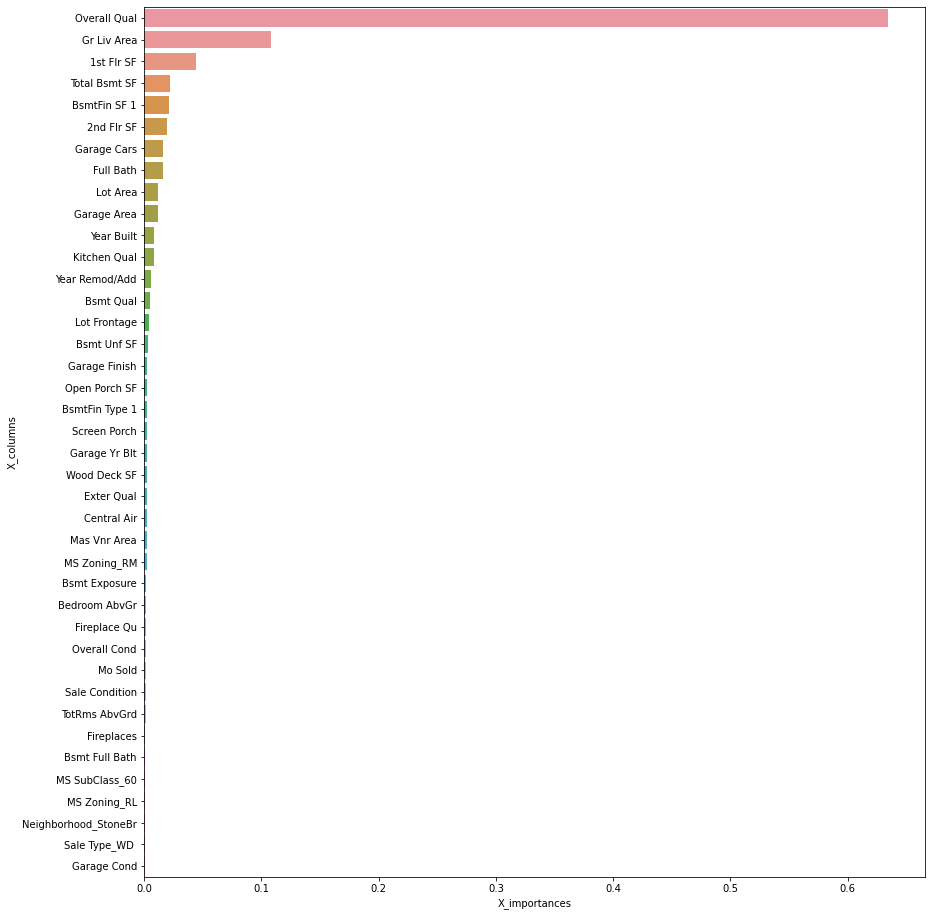

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

ranfo_df_ = ranfo_df_sorted.head(40)
plt.figure(figsize=(14,16))
ax = sns.barplot(x='X_importances', y='X_columns', data=ranfo_df_)

## 8. Training Models with Top 15 Features
#### Top 15 features

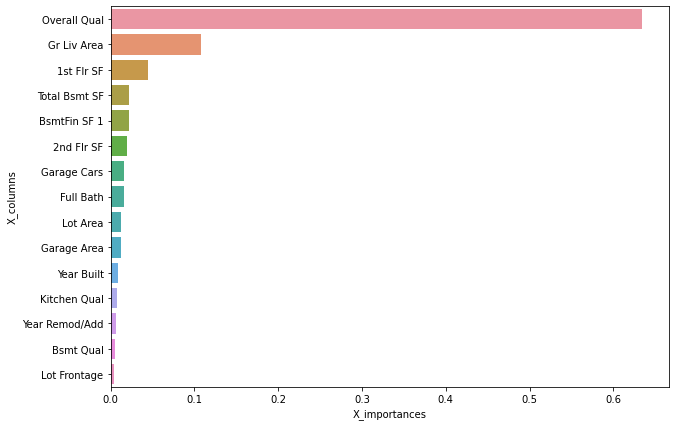

In [14]:
ranfo_df_15 = ranfo_df_sorted.head(15)
plt.figure(figsize=(10,7))
ax = sns.barplot(x='X_importances', y='X_columns', data=ranfo_df_15)

In [15]:
X_15cols = list(ranfo_df_15['X_columns'])
X_train15 = train[X_15cols].copy()
X_train15.head()

Overall Qual  Gr Liv Area  1st Flr SF  Total Bsmt SF  BsmtFin SF 1  \
0             7       -0.244       0.559          0.098        -0.979   
1             5        1.255       0.013         -0.078        -0.428   
2             4       -0.533       0.180         -2.399        -0.979   
3             4       -0.898      -0.298         -2.399        -0.979   
4             4        0.413      -0.140         -1.024        -0.979   

   2nd Flr SF  Garage Cars  Full Bath  Lot Area  Garage Area  Year Built  \
0      -0.781            2          2     0.034        0.047       0.181   
1       1.481            2          2     2.307        0.325      -0.116   
2      -0.781            2          2    -0.036       -0.033      -0.280   
3      -0.781            2          2    -0.364       -0.231      -0.709   
4       0.624            0          2    -0.311       -2.209      -1.665   

   Kitchen Qual  Year Remod/Add  Bsmt Qual  Lot Frontage  
0             5          -0.381          7         0.469  
1             5          -0.814          5         0.410  
2             5          -1.055          0         0.014  
3             5          -1.632          0        -0.441  
4             3          -1.632          3        -0.305

## 9. Random Forest and KNN with the 15 Features

In [16]:
ranfo15 = RandomForestRegressor(max_depth=8, min_samples_leaf=1,
                            min_samples_split=4)
ranfo15_mse = cross_val_score(ranfo15, X_train15, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ranfo15_rmse = np.sqrt(np.absolute(ranfo15_mse))
print('RMSE:', ranfo15_rmse)
print('Avg_RMSE:', ranfo15_rmse.mean())
print('Std_RMSE:', ranfo15_rmse.std())

RMSE: [23159.13229874 26837.95797248 24406.88998119 27988.975578
 26603.64717992 27849.63122848 34906.88519806 26993.17355944
 24903.40339498 23522.64587719]
Avg_RMSE: 26717.234226848734
Std_RMSE: 3186.9547799395627


In [17]:
knn15 = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, 
                        p=1, weights='distance')
knn15_mse = cross_val_score(knn15, X_train15, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
knn15_rmse = np.sqrt(np.absolute(knn15_mse))
print('RMSE:', knn15_rmse)
print('Avg_RMSE:', knn15_rmse.mean())
print('Std_RMSE:', knn15_rmse.std())

RMSE: [25592.90341751 32240.29597222 26450.27384054 27578.37879796
 26975.59203888 24198.77030571 31496.68059445 25901.02304062
 24851.79594142 23859.71519416]
Avg_RMSE: 26914.54291434795
Std_RMSE: 2715.802902126218


So this is actually an improvement to the models with all features included. Yes, the error doesn't improve much (still better), but at least the standard deviation is lowered significantly. The random forest is still slightly better than the KNN

## 10. Addressing the Multicolinearity Problem
During the Feature Engineering stage, we mentioned pairs of features that are highly correlated and we said one of them should be dropped:
- 0.88 Garage Area & Garage Cars
- 0.81 1st Flr SF & Total Bsmt SF
- 0.82 Garage Yr Blt & Year Built
- 0.81 Gr Liv Area & TotRms AbvGrd

If the any of these pairs are part of our elite features, we can drop the one with the lower ranking (importance):
- drop `Garage Area`
- drop `Total Bsmt SF`

We will be left with 13 features

In [18]:
drop_cols = ['Garage Area', 'Total Bsmt SF']
X_train13 = X_train15.drop(drop_cols, axis=1)
X_train13.head()

Overall Qual  Gr Liv Area  1st Flr SF  BsmtFin SF 1  2nd Flr SF  \
0             7       -0.244       0.559        -0.979      -0.781   
1             5        1.255       0.013        -0.428       1.481   
2             4       -0.533       0.180        -0.979      -0.781   
3             4       -0.898      -0.298        -0.979      -0.781   
4             4        0.413      -0.140        -0.979       0.624   

   Garage Cars  Full Bath  Lot Area  Year Built  Kitchen Qual  Year Remod/Add  \
0            2          2     0.034       0.181             5          -0.381   
1            2          2     2.307      -0.116             5          -0.814   
2            2          2    -0.036      -0.280             5          -1.055   
3            2          2    -0.364      -0.709             5          -1.632   
4            0          2    -0.311      -1.665             3          -1.632   

   Bsmt Qual  Lot Frontage  
0          7         0.469  
1          5         0.410  
2          0         0.014  
3          0        -0.441  
4          3        -0.305

In [19]:
ranfo13 = RandomForestRegressor(max_depth=8, min_samples_leaf=1,
                            min_samples_split=4)
ranfo13_mse = cross_val_score(ranfo13, X_train13, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ranfo13_rmse = np.sqrt(np.absolute(ranfo13_mse))
print('RMSE:', ranfo13_rmse)
print('Avg_RMSE:', ranfo13_rmse.mean())
print('Std_RMSE:', ranfo13_rmse.std())

RMSE: [23110.25425132 28320.7423151  23741.67261256 28150.52014786
 27287.918641   27868.82505595 34139.26795258 27324.31459704
 25948.26392918 23786.9898716 ]
Avg_RMSE: 26967.87693741845
Std_RMSE: 3035.5596047719446


In [20]:
knn13 = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, 
                        p=1, weights='distance')
knn13_mse = cross_val_score(knn13, X_train13, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
knn13_rmse = np.sqrt(np.absolute(knn13_mse))
print('RMSE:', knn13_rmse)
print('Avg_RMSE:', knn13_rmse.mean())
print('Std_RMSE:', knn13_rmse.std())

RMSE: [25490.79799321 31432.9327962  25526.30870001 27990.2820825
 27118.45458111 24081.7909076  31260.79843074 26407.24001657
 25738.44353546 23089.94619649]
Avg_RMSE: 26813.699523988656
Std_RMSE: 2620.1091345502127


The models are slightly worse, which is fine!

## 11. Preprocessing the Test Set

In [21]:
test = pipeline.transform(holdout)
test.head()

Lot Frontage  Lot Area  Lot Shape  Land Slope  Overall Qual  Overall Cond  \
0        -0.192    -0.717          8           9             8             7   
1        -2.251    -1.165          8           9             6             7   
2        -0.363    -0.429          8           9             7             5   
3        -0.455    -0.302          8           9             4             5   
4        -0.916    -0.451          8           9             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  \
0      -1.680           0.491        -0.568           5           7   
1      -0.093          -0.646         1.304           5           5   
2       0.954           0.870         0.368           7           5   
3       0.650           0.444        -0.568           5           5   
4      -1.646           0.586        -0.568           5           7   

   Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  \
0          5          5              2               2        -0.945   
1          5          5              2               6        -0.343   
2          7          5              2               2        -0.945   
3          7          5              2               7         0.309   
4          5          5              2               4        -0.307   

   BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Heating QC  \
0               2        -0.294        0.020         -1.057           3   
1               2        -0.294       -0.795         -1.263           9   
2               2        -0.294        0.471         -0.601           9   
3               2        -0.294       -0.383         -0.175           9   
4               7        -0.050       -0.051         -0.386           5   

   Central Air  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0           10      -0.828       1.132           -0.111        0.274   
1           10      -1.640       0.447           -0.111       -0.978   
2           10      -0.893       1.328           -0.111        0.388   
3           10      -0.452      -0.791           -0.111       -1.057   
4           10      -0.622      -0.791           -0.111       -1.197   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          1          0              3   
1               0               0          1          1              3   
2               0               0          2          1              3   
3               1               0          1          0              3   
4               1               0          1          0              2   

   Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  \
0              1             7              7           8           1   
1              1             5              6           8           0   
2              1             7              8           8           1   
3              1             5              5           8           0   
4              1             5              5           8           0   

   Fireplace Qu  Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  \
0             7          0.011              3            1       -1.157   
1             0         -0.312              3            1       -0.996   
2             7         -0.491              9            2        0.571   
3             0         -0.706              0            0       -2.172   
4             0         -0.563              3            1       -1.304   

   Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
0            5            5            9         0.754          0.225   
1            5            5            9        -0.698         -0.741   
2            5            5            9         0.572          0.133   
3            0            0            9        -0.698         -0.741   
4            5            5            6        -0.698         -0.741   

   E

It's got `37 columns` fewer than the training set possibly due to the fact that some minor categories did not show up in the test set, which is 4x smaller than the training set.

In [22]:
X_test = test.drop(['SalePrice'], axis=1)
y_test = test['SalePrice']
X_test.shape, y_test.shape

((586, 208), (586,))

In [23]:
test13_cols = X_train13.columns
X_test = test[test13_cols].copy()
X_test.head()

Overall Qual  Gr Liv Area  1st Flr SF  BsmtFin SF 1  2nd Flr SF  \
0             8        0.274      -0.828        -0.945       1.132   
1             6       -0.978      -1.640        -0.343       0.447   
2             7        0.388      -0.893        -0.945       1.328   
3             4       -1.057      -0.452         0.309      -0.791   
4             6       -1.197      -0.622        -0.307      -0.791   

   Garage Cars  Full Bath  Lot Area  Year Built  Kitchen Qual  Year Remod/Add  \
0            1          1    -0.717      -1.680             7           0.491   
1            1          1    -1.165      -0.093             5          -0.646   
2            2          2    -0.429       0.954             7           0.870   
3            0          1    -0.302       0.650             5           0.444   
4            1          1    -0.451      -1.646             5           0.586   

   Bsmt Qual  Lot Frontage  
0          5        -0.192  
1          5        -2.251  
2          7        -0.363  
3          7        -0.455  
4          5        -0.916

## 12. Model Testing
#### Random Forest

In [24]:
from sklearn.metrics import mean_squared_error

ran13 = RandomForestRegressor(max_depth=8, min_samples_leaf=1,
                            min_samples_split=4)
ran13.fit(X_train13, y_train)
y_pred = ran13.predict(X_train13)
mse13 = mean_squared_error(y_train, y_pred)
rmse13 = np.sqrt(mse13)
print('MSE_train:', mse13)
print('RMSE_train:', rmse13)

MSE_train: 284552190.0486696
RMSE_train: 16868.674816021252


In [25]:
y_pred_t = ran13.predict(X_test)
mse_t = mean_squared_error(y_test, y_pred_t)
rmse_t = np.sqrt(mse_t)
print('MSE_test:', mse_t)
print('RMSE_test:', rmse_t)

MSE_test: 791494463.5629228
RMSE_test: 28133.51139767169


The test RMSE is pretty close to what we got with cross validation. Not bad!
#### KNN

In [26]:
knn13 = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, 
                        p=1, weights='distance')
knn13.fit(X_train13, y_train)
y_pred13 = knn13.predict(X_train13)
mse13 = mean_squared_error(y_train, y_pred13)
rmse13 = np.sqrt(mse13)
print('MSE_train:', mse13)
print('RMSE_train:', rmse13)

MSE_train: 34403.819112627985
RMSE_train: 185.48266526181897


In [27]:
y_pred = knn13.predict(X_test)
mse_t = mean_squared_error(y_test, y_pred)
rmse_t = np.sqrt(mse_t)
print('MSE_test:', mse_t)
print('RMSE_test:', rmse_t)

MSE_test: 983796109.938969
RMSE_test: 31365.52422547675


So the best model is `RandomForestRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=4)`, while using the best `13 features` after removing one of the `colinear` features. **RMSE = 28,779**. Let's save out preprocessed train and test sets and in the next chapter we will see what happens if we work on outliers

## 13. Saving New Train and Test Sets

In [28]:
train_14 = X_train13.copy()
train_14['SalePrice'] = train['SalePrice'].copy()
test_14 = X_test.copy()
test_14['SalePrice'] = test['SalePrice'].copy()

train_14.shape, test_14.shape

((2344, 14), (586, 14))

In [29]:
train.to_csv('data/Ames_Housing2_train14', index=False)
test.to_csv('data/Ames_Housing2_test14', index=False)

joblib.dump(ran13, 'files/ames_random_forest')
joblib.dump(knn13, 'files/ames_nearest_neighbors')

['files/ames_nearest_neighbors']

Next up `DEALING WITH OUTLIERS`